Zadanie 1.

In [1]:
import math
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import interp1d

def interpolationl(Lx,Ly):
    def functionreturned(x):
        suml=0
        for i in range(0,len(Lx)):
            res=1
            for j in range(0,len(Lx)):
                if(i==j):
                    continue
                res*=((x-Lx[j])/(Lx[i]-Lx[j]))
            suml+=Ly[i]*res
        return suml
    return functionreturned

Zadanie 2.

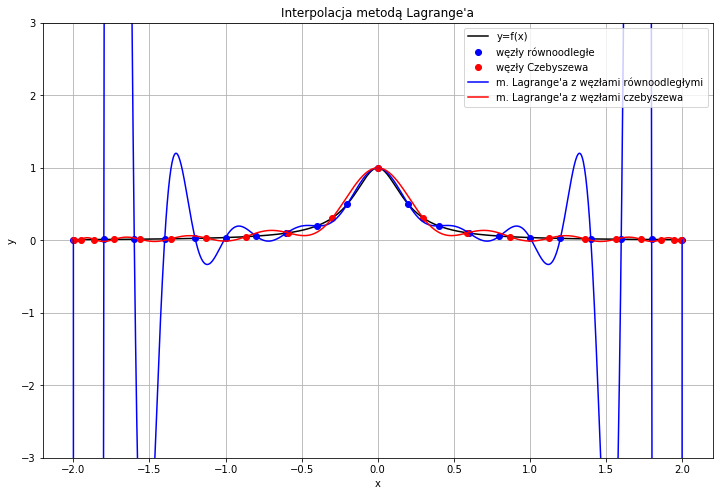

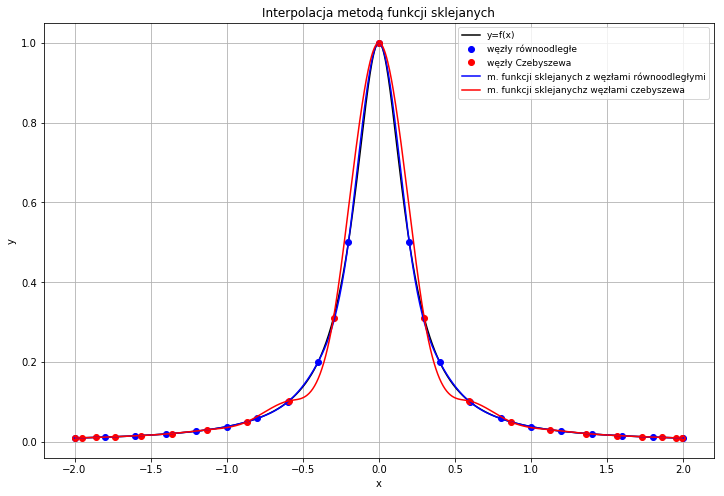

In [17]:
def function(x):
    return 1/(25*x*x+1)
                
x0 = scipy.linspace(-2,2,1000)
y0 = []
for i in range(x0.size):
    y0.append(function(x0[i]))

x = scipy.linspace(-2,2,21)
y = []
for i in range(x.size):
    y.append(function(x[i]))

n=21
a=-2
b=2
xc=[]                   
for k in range(1, n+1):
    xc.append(((a+b)/2)+((b-a)/2)*math.cos(math.pi*(2*k-1)/(2*n)))


xc=xc[::-1]
xch=np.array(xc)
ych=function(xch)

plt.figure(num=None, figsize=(12, 8))
plt.plot(x0,y0, linestyle='-', color='black', label='y=f(x)')
plt.plot(x,function(x), 'bo',label='węzły równoodległe')
plt.plot(xch,function(xch), 'ro',label='węzły Czebyszewa')
plt.plot(x0,interpolationl(x,y)(x0),'b-',label='m. Lagrange\'a z węzłami równoodległymi')
plt.plot(x0,interpolationl(xch,ych)(x0),'r-',label='m. Lagrange\'a z węzłami czebyszewa')
plt.title('Interpolacja metodą Lagrange\'a')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-3,3)
plt.legend(loc='upper right',prop={'size': 10})
plt.grid()
plt.show()




plt.figure(num=None, figsize=(12, 8))
plt.plot(x0,y0, linestyle='-', color='black',label='y=f(x)')
plt.plot(x,y, 'bo',label='węzły równoodległe')
plt.plot(xch,ych, 'ro',label='węzły Czebyszewa')
plt.plot(x0,interp1d(x,y,'cubic')(x0),'b-',label='m. funkcji sklejanych z węzłami równoodległymi')
plt.plot(x0,interp1d(xch,ych,'cubic',bounds_error=False)(x0),'r-',label='m. funkcji sklejanychz węzłami czebyszewa')
plt.title('Interpolacja metodą funkcji sklejanych')
plt.xlabel('x')
plt.ylabel('y')

plt.legend(loc='upper right',prop={'size': 9})
plt.grid()
plt.show()


Interpolacja metodą funkcji sklejanych jest skuteczniejsza,różnicę widać szczególnie przy zastosowaniu węzłów równoodległych.
W przypadku węzłów równoodległych(w m.Lagrange'a) mamy do czynienia z efektem Rungego. Początkowo ze wzrostem liczby węzłów przybliżenie poprawia się, jednak po dalszym wzroście zaczyna się pogarszać, co jest szczególnie widoczne na końcach przedziału.
Takie zachowanie wielomianu interpolującego jest zjawiskiem typowym dla interpolacji za pomocą wielomianów wysokich stopni przy stałych odległościach węzłów.
Aby uniknąć tego efektu, stosuje się interpolację z węzłami Czebyszewa.

Zadanie 3.

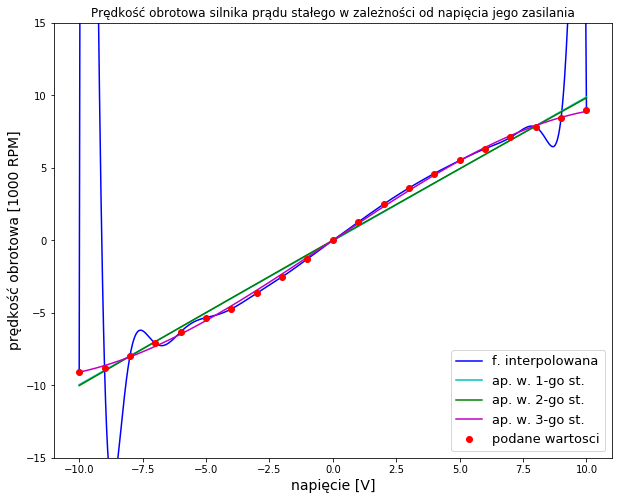

In [16]:
a=[-10.0,-9.0,-8.0,-7.0,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]
b=[-9.10,-8.82,-7.99,-7.10,-6.32,-5.33,-4.73,-3.65,-2.52,-1.28,0.00,1.26,2.49,3.61,4.61,5.51,6.32,7.10,7.81,8.45,9.02]
lag=scipy.interpolate.lagrange(a,b)

approximation1=np.poly1d(np.polyfit(a,b,deg=1))
approximation2=np.poly1d(np.polyfit(a,b,deg=2))
approximation3=np.poly1d(np.polyfit(a,b,deg=3))
x = scipy.linspace(-10,10,1000)
plt.figure(num=None, figsize=(10, 8))
plt.plot(x,lag(x), 'b-',label='f. interpolowana')
plt.plot(x,approximation1(x), 'c-',label='ap. w. 1-go st.')
plt.plot(x,approximation2(x), 'g-',label='ap. w. 2-go st.')
plt.plot(x,approximation3(x), 'm-',label='ap. w. 3-go st.')
plt.plot(a,b, 'ro',label='podane wartosci')
plt.title('Prędkość obrotowa silnika prądu stałego w zależności od napięcia jego zasilania',fontsize=12)
plt.xlabel('napięcie [V]',fontsize=14)
plt.ylabel('prędkość obrotowa [1000 RPM]',fontsize=14)
plt.ylim(-15,15)
plt.legend(loc='lower right',prop={'size': 13})
plt.show()


Interpolacja wielomianowa okazuje się najmiej skuteczna, gdyż wartości funckji pomiędzy węzłami znajdujących się bliżej krańców przedziału znacznie różnią sie od wartosci oczekiwanych.Nazywamy to efektem Rungego.
W tym przypadku lepsze będzie zastosowanie aproksymacji wielmianowej, na zadanym przedziale najskuteczniejsza będzie aproksymacja wielomianem 3 stopnia.

Zadanie 4.

Kierowca minął fotoradr po 2.29 s.
Jechał z prędkością 78.03 km/h.


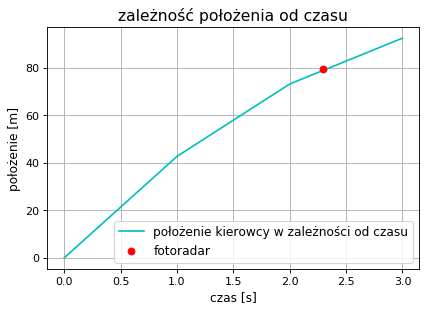

In [5]:
t=[0.0,1.0,2.0,3.0]
s=[0.0,42.7,73.2,92.5]
x=79.6
approximationts=np.poly1d(np.polyfit(s,t,deg=3))
approximationtsv=np.poly1d(np.polyfit(t,s,deg=3))
y=approximationts(x)
print("Kierowca minął fotoradr po",round(y,2),"s." )
v = scipy.misc.derivative(approximationtsv,y)
print("Jechał z prędkością",round(v*3.6,2),"km/h.")

plt.figure(num=None, figsize=(6, 4), dpi=80)
plt.plot(t,approximationtsv(t), 'c-',label='położenie kierowcy w zależności od czasu')
plt.plot(y,x,'ro',label='fotoradar')
plt.title('zależność położenia od czasu',fontsize=14)
plt.xlabel('czas [s]',fontsize=11)
plt.ylabel('położenie [m]',fontsize=11)
plt.legend(loc='lower right',prop={'size': 11})
plt.grid(True, which="both")
plt.show()